Here's a breakdown of my datasets

1. Field Player Stats (Player-Level)
Files:
modified_field_player_detail_2020_2021.csv
modified_field_player_detail_2021_2022.csv
modified_field_player_detail_2022_2023.csv
modified_field_player_detail_2023_2024.csv
Headers:
POS Position, Name, Team, Position, P Played, G 7M goals, % 7M Shooting accuracy, G Full back - Goals, % Full back - Shooting accuracy, T Centre back - Goals, % Centre back - Shooting accuracy, G Wing - Goals, % Wing - Shooting accuracy, G Pivot - Goals, % Pivot - Shooting accuracy, G Fast breaks - Goals, % Fast breaks - Shooting accuracy

2. Goalkeeper Stats (Player-Level)
Files:
modified_Goalkeeper_2020_2021.csv
modified_Goalkeeper_2021_2022.csv
modified_Goalkeeper_2022_2023.csv
modified_Goalkeeper_2023_2024.csv
Headers:
POS Position, Name, Team, Position, P Played, S Saves, S 7M saves, % 7M save accuracy, S Full back - Saves, % Full back - Save accuracy, P Centre back - Saves, % Centre back - Save accuracy, S Wing - Saves, % Wing - Save accuracy, S Pivot - Saves, % Pivot - Save accuracy, S Fast breaks - Saves, % Fast breaks - Save accuracy, G Goals

3. Team Offensive Performance (Team-Level)
Files:
Team_offense_2020_2021.csv
Team_offense_2021_2022.csv
Team_offense_2022_2023.csv
Team_offense_2023_2024.csv
Headers:
POS Position, Team, P Played, G Goals, FG Field goals, G 7M goals, % Shooting accuracy, G Full back - Goals, % Full back - Shooting accuracy, T Centre back - Goals, % Centre back - Shooting accuracy, G Wing - Goals, % Wing - Shooting accuracy, G Pivot - Goals, % Pivot - Shooting accuracy, G Fast breaks - Goals, % Fast breaks - Shooting accuracy, TF Technical Fouls

4. Team Defensive Performance (Team-Level)
Files:
Team_defense_2020_2021.csv
Team_defense_2021_2022.csv
Team_defense_2022_2023.csv
Team_defense_2023_2024.csv
Headers:
POS Position, Team, P Played, GC Goals conceded, S Saves, % Save accuracy, GC 7m Goals conceded, GC Centre back - Goals conceded, GC Full back - Goals conceded, GC Wing - Goals conceded, GC Pivot - Goals conceded, GC Fast breaks - Goals conceded, ST Steals, BL Blocks, YC Yellow cards, 2Min Sin-bins, RC Red cards, BC Blue Cards

5. Overall Team Standings (Team-Level)
Files:
Overall_standings_2020_2021_modified.csv
Overall_standings_2021_2022_modified.csv
Overall_standings_2022_2023_modified.csv
Overall_standings_2023_2024_modified.csv
Headers:
P, Team, G, W, D, L, Pts, Diff, +, -



In [ ]:
%pip install pandas matplotlib scikit-learn
%pip install seaborn
%pip install plotly
%pip install nbformat


code to convert html file to csv for making new datasets from the "daikin-hbl" site 

In [ ]:
import csv
from bs4 import BeautifulSoup

# Load the HTML file
with open('input_name.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using the built-in HTML parser
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table
table = soup.find('table')

# Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    rows.append([cell.text.strip() for cell in cells])

# Write to CSV
with open('output_name.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write headers if present
    if headers:
        writer.writerow(headers)
    # Write the rows
    writer.writerows(rows)

code to fix csv from "daikin-hbl" site 


In [ ]:
import pandas as pd
import re

# Load the CSV file and skip the first two rows
file_path = 'Goalkeeper_2023_2024.csv' 
df = pd.read_csv(file_path, skiprows=2)

# Find the index of the "Name" column
name_index = df.columns.get_loc("Name")

# Insert two new columns next to "Name"
df.insert(name_index + 1, "Team", "")
df.insert(name_index + 2, "Position", "")

def extract_details(name):
    # Extract the first name
    first_comma_index = name.find(',')
    first_name = name[:first_comma_index].strip()
    
    # Remaining part after the first comma
    remaining_part = name[first_comma_index + 1:].strip()
    
    # Extract the position (after the last comma)
    last_comma_index = remaining_part.rfind(',')
    position = remaining_part[last_comma_index + 1:].strip()
    
    # Extract the team name (search backward from the last comma for the first lowercase letter)
    team_name_part = remaining_part[:last_comma_index].strip()
    
    # Find the start index of the team name
    lowercase_match = re.search(r'[a-z]', team_name_part[::-1])
    if lowercase_match:
        team_name_start_index = len(team_name_part) - lowercase_match.start()  # Calculate start index from end
    else:
        team_name_start_index = 0  # Fallback in case no lowercase letter is found

    # Extract the team name
    team_name = team_name_part[team_name_start_index:].strip()
    
    last_name_start_index = 3  # Fallback if 'Â' is not found
    
    # Extract the last name (from the adjusted start index to the start of the team name)
    last_name = team_name_part[last_name_start_index:team_name_start_index].strip()
    
    formatted_name = f"{first_name} {last_name}".strip()
    
    return formatted_name, team_name, position

# Apply the function to extract team and position, and correct the name
df['Name'], df['Team'], df['Position'] = zip(*df['Name'].apply(extract_details))

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_Goalkeeper_2023_2024.csv', index=False)


short the team's names in the excel

In [ ]:
import csv

# Mapping of team names to shortcuts
team_shortcuts = {
    "THW Kiel": "THW",
    "SG Flensburg-Handewitt": "SGF",
    "SC Magdeburg": "SCM",
    "FÃ¼chse Berlin": "BER",
    "Rhein-Neckar LÃ¶wen": "RNL",
    "SC DHfK Leipzig": "LEI",
    "FRISCH AUF! GÃ¶ppingen": "FAG",
    "MT Melsungen": "MTM",
    "TBV Lemgo Lippe": "TBV",
    "HSG Wetzlar": "WET",
    "TSV Hannover-Burgdorf": "HAN",
    "Bergischer HC": "BHC",
    "HC Erlangen": "HCE",
    "TVB Stuttgart": "TVB",
    "HBW Balingen-Weilstetten": "HBW",
    "GWD Minden": "GWD",
    "Eulen Ludwigshafen": "LUD",
    "HSG Nordhorn-Lingen": "NOL",
    "TuSEM Essen": "TUE",
    "HSC 2000 Coburg": "COB"
}

# Function to replace team names with shortcuts
def replace_team_names(input_file, output_file):
    with open(input_file, mode='r', newline='', encoding='utf-8') as infile, \
         open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
        
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row in reader:
            new_row = [team_shortcuts.get(cell, cell) for cell in row]
            writer.writerow(new_row)

# Replace 'input.csv' with your actual input file and specify the desired output file
input_file = 'Overall_standings_2023_2024.csv'
output_file = 'Overall_standings_2023_2024_modified.csv'

replace_team_names(input_file, output_file)


1.Data Processing and Aggregation

In [26]:
import numpy as np
import pandas as pd
import plotly.express as px

# Load and combine league standings data from multiple seasons
league_table = pd.concat([pd.read_csv(f'Overall_standings_{year}_modified.csv') for year in ['2020_2021', '2021_2022', '2022_2023']])

# Calculate points based on wins (W) and draws (D)
league_table['Points'] = 2 * league_table['W'] + 1 * league_table['D']
points = league_table['Points']

# Load and combine player stats data from multiple seasons
player_stats = pd.concat([pd.read_csv(f'modified_field_player_detail_{year}.csv') for year in ['2020_2021', '2021_2022', '2022_2023']])

# Load and combine goalkeeper stats data from multiple seasons
goalkeeper_stats = pd.concat([pd.read_csv(f'modified_Goalkeeper_{year}.csv') for year in ['2020_2021', '2021_2022', '2022_2023']])

# Prepare team standings data by dropping unnecessary columns
team_standings = league_table.drop(columns=['W','D','L','Diff','+','-'])

# Convert 'Team' column to string type in player and goalkeeper stats data
player_stats['Team'] = player_stats['Team'].astype(str)
goalkeeper_stats['Team'] = goalkeeper_stats['Team'].astype(str)

# Clean percentage columns in player stats
for col in player_stats.columns:
    if player_stats[col].dtype == 'object' and '%' in str(player_stats[col].iloc[0]):
        player_stats[col] = player_stats[col].replace('-', np.nan)  # Replace '-' with NaN
        player_stats[col] = player_stats[col].str.rstrip('%').astype(float)  # Remove '%' and convert to float

# Clean percentage columns in goalkeeper stats
for col in goalkeeper_stats.columns:
    if goalkeeper_stats[col].dtype == 'object' and '%' in str(goalkeeper_stats[col].iloc[0]):
        goalkeeper_stats[col] = goalkeeper_stats[col].replace('-', np.nan)  # Replace '-' with NaN
        goalkeeper_stats[col] = goalkeeper_stats[col].str.rstrip('%').astype(float)  # Remove '%' and convert to float

# Drop non-numeric columns from player and goalkeeper stats
numeric_player_stats = player_stats.drop(columns=['Name', 'Team', 'Position'])
numeric_goalkeeper_stats = goalkeeper_stats.drop(columns=['Name', 'Team', 'Position'])

# Convert all columns to numeric type, coerce errors to NaN
numeric_player_stats = numeric_player_stats.apply(pd.to_numeric, errors='coerce')
numeric_goalkeeper_stats = numeric_goalkeeper_stats.apply(pd.to_numeric, errors='coerce')

# Group player and goalkeeper stats by team and calculate the mean
player_stats_grouped = numeric_player_stats.groupby(player_stats['Team']).mean().reset_index()
goalkeeper_stats_grouped = numeric_goalkeeper_stats.groupby(goalkeeper_stats['Team']).mean().reset_index()

# Ensure 'Team' column is string type for merging
player_stats_grouped['Team'] = player_stats_grouped['Team'].astype(str)
goalkeeper_stats_grouped['Team'] = goalkeeper_stats_grouped['Team'].astype(str)
team_standings['Team'] = team_standings['Team'].astype(str)

# Merge player stats, goalkeeper stats, and team standings on 'Team' column
merged_data_filtered = player_stats_grouped.merge(goalkeeper_stats_grouped, on='Team', how='inner')
merged_data_filtered = merged_data_filtered.merge(team_standings, on='Team', how='inner')

# Fill missing values in numeric columns with the mean of each column
numeric_columns = merged_data_filtered.select_dtypes(include=['number']).columns
merged_data_filtered[numeric_columns] = merged_data_filtered[numeric_columns].fillna(merged_data_filtered[numeric_columns].mean())


2.Preparation of Features and Target Variable for Machine Learning








In [27]:
target = 'Pts'

features = merged_data_filtered.drop(columns=['Team', target])

features = features.apply(pd.to_numeric, errors='coerce')

features = features.replace([np.inf, -np.inf], np.nan)
features = features.fillna(features.mean())

target_values = merged_data_filtered[target]


3.Splitting Data into Training and Testing Sets








In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target_values, test_size=0.2, random_state=42)


4.Random Forest Regression Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Remove 'Points' column if it exists in the dataframe
if 'Points' in merged_data_filtered.columns:
    merged_data_filtered = merged_data_filtered.drop(columns=['Points'])

# Add 'Points' column from team standings to the filtered data
merged_data_filtered = merged_data_filtered.merge(team_standings[['Team', 'Points']], on='Team', how='left')

# Remove rows with missing 'Points' values
merged_data_filtered = merged_data_filtered.dropna(subset=['Points'])

# Clean and convert columns with object data types
for col in merged_data_filtered.columns:
    if merged_data_filtered[col].dtype == 'object':
        merged_data_filtered[col] = merged_data_filtered[col].replace('-', np.nan)  # Replace '-' with NaN
        if merged_data_filtered[col].str.contains('%').any():
            merged_data_filtered[col] = merged_data_filtered[col].str.rstrip('%').astype(float)  # Convert '%' to float

# Convert all columns to numeric, coercing errors to NaN
merged_data_filtered = merged_data_filtered.apply(pd.to_numeric, errors='coerce')

# Fill missing values with column mean
merged_data_filtered = merged_data_filtered.fillna(merged_data_filtered.mean())

# Define target variable 'Points'
y = merged_data_filtered['Points']

# Define feature variables, excluding 'Points', 'Team', and 'Pts'
X = merged_data_filtered.drop(columns=['Points', 'Team', 'Pts'])

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print a sample of the training target variable for verification
print("y_train sample:\n", y_train.head(10))

# Initialize and train the Random Forest model with 100 trees
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R^2 Score
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


y_train sample:
 22     23
15     30
65     42
11     29
42     36
146    17
51     16
27     38
4      52
32     13
Name: Points, dtype: int64
Mean Absolute Error: 6.320000565175566
R^2 Score: 0.709166158751058


5.The 3 seasons league tables we used to train our model. 

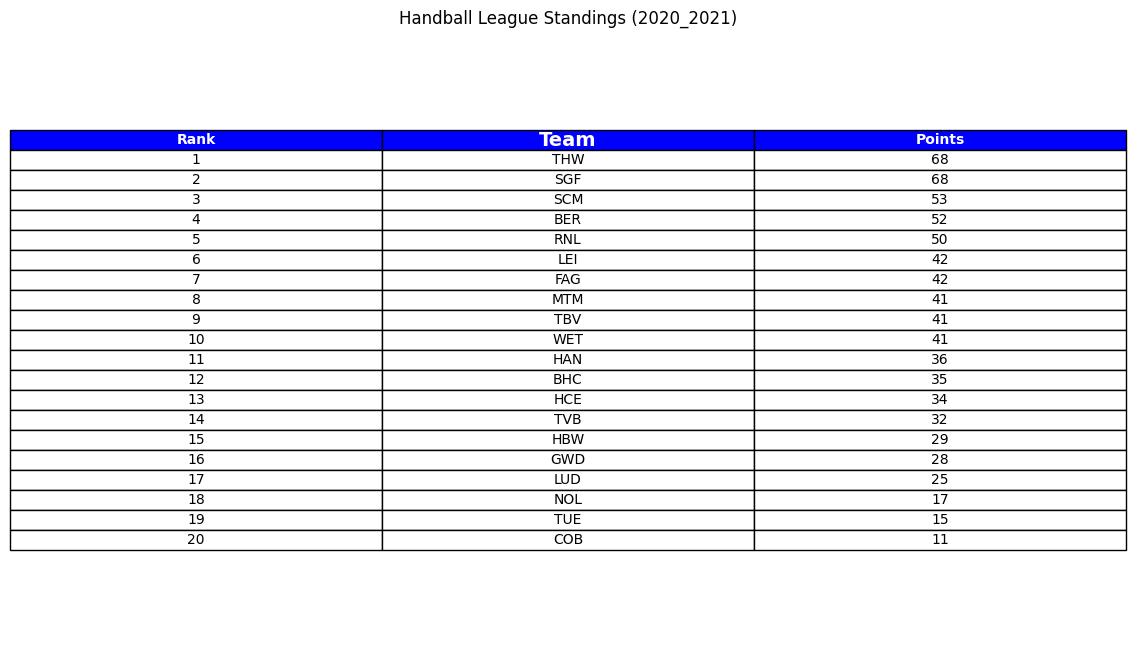

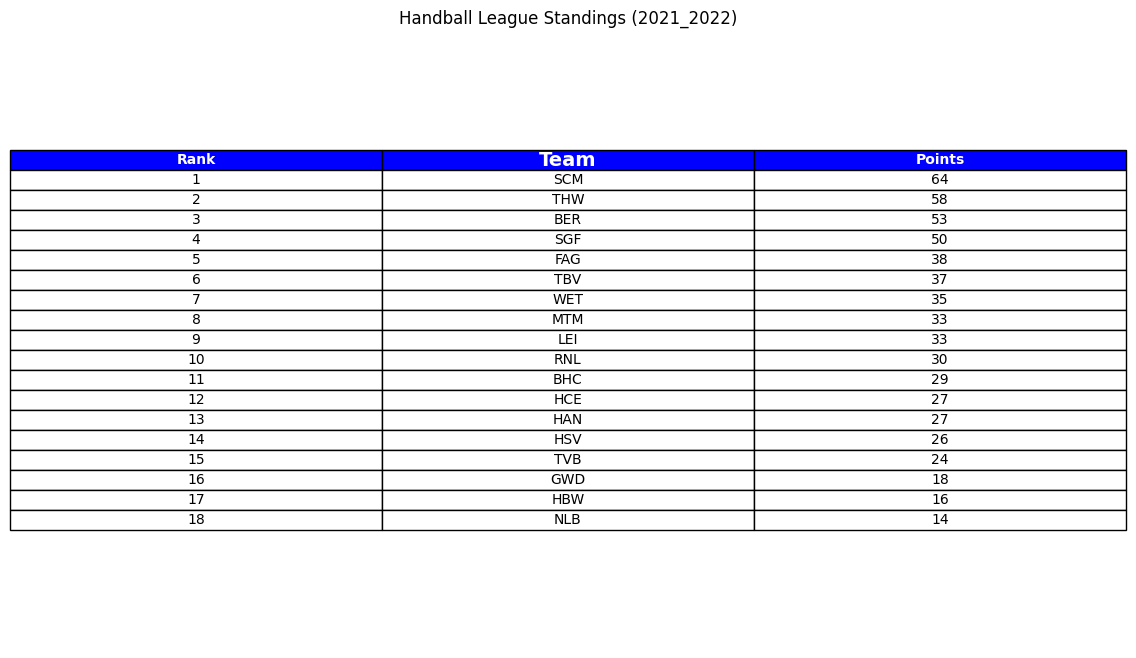

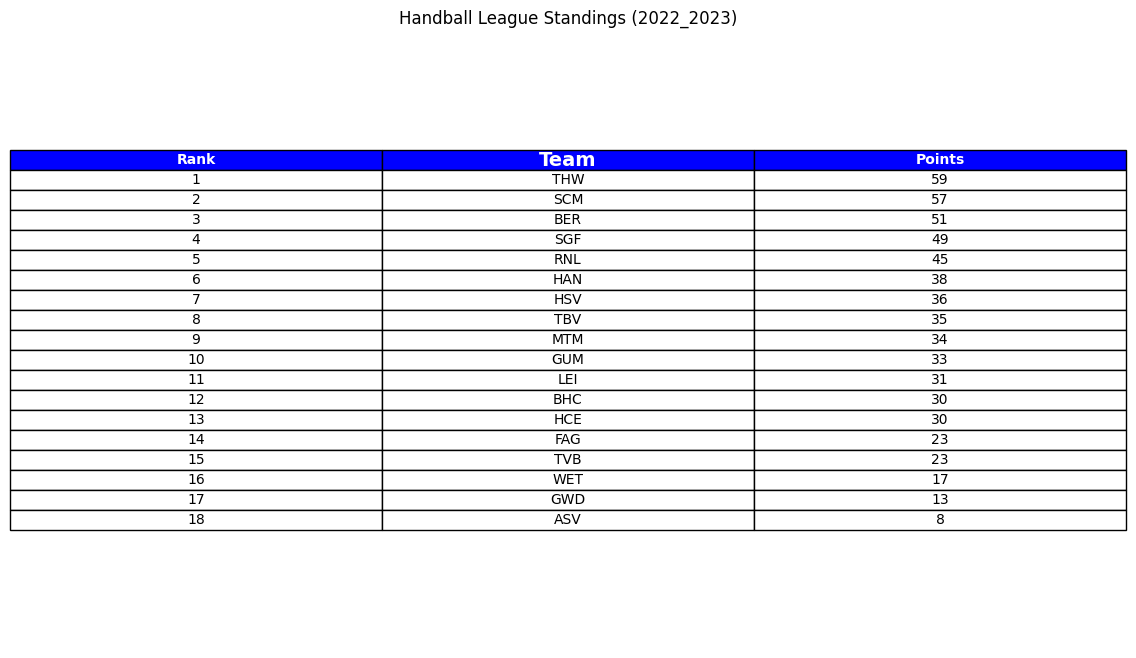

In [30]:
import matplotlib.pyplot as plt

for year in ["2020_2021", "2021_2022", "2022_2023"]:
    file_path = f'Overall_standings_{year}_modified.csv'
    league_table = pd.read_csv(file_path)

    league_table['Points'] = 2 * league_table['W'] + 1 * league_table['D']

    sorted_league_table = league_table.sort_values(by='Points', ascending=False).reset_index(drop=True)

    sorted_league_table['Rank'] = range(1, len(sorted_league_table) + 1)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('tight')
    ax.axis('off')

    table_data = sorted_league_table[['Rank', 'Team', 'Points']].values.tolist()
    column_labels = ['Rank', 'Team', 'Points']

    table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    header = table[0, 1].get_text()
    header.set_color('white')
    header.set_fontweight('bold')
    header.set_fontsize(14)

    for i in range(len(column_labels)):
        cell = table[0, i]
        cell.set_facecolor('blue')
        cell.set_text_props(color='white', weight='bold')

    table21 = plt
    table21.title(f'Handball League Standings ({year})')
    table21.show()


6.Making Predictions


In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load and combine player stats for the 2023-2024 season
player_stats_2023_2024 = pd.concat([
    pd.read_csv(f'modified_field_player_detail_{year}.csv') for year in ['2023_2024']])

# Load and combine goalkeeper stats for the 2023-2024 season
goalkeeper_stats_2023_2024 = pd.concat([
    pd.read_csv(f'modified_Goalkeeper_{year}.csv') for year in ['2023_2024']])

# Load and combine team offensive stats for the 2023-2024 season
team_offense_2023_2024 = pd.concat([
    pd.read_csv(f'Team_offense_{year}.csv') for year in ['2023_2024']])

# Load and combine team defensive stats for the 2023-2024 season
team_defense_2023_2024 = pd.concat([
    pd.read_csv(f'Team_defense_{year}.csv') for year in ['2023_2024']])

# Function to clean percentage columns and convert them to float
def clean_percentage_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].replace('-', np.nan)  # Replace '-' with NaN
            if df[col].str.contains('%').any():
                df[col] = df[col].str.rstrip('%').astype(float) / 100.0  # Convert '%' to float (0-1 scale)
            df[col] = pd.to_numeric(df[col], errors='ignore')  # Convert to numeric, ignoring errors
    return df

# Apply the cleaning function to each dataset
player_stats_2023_2024 = clean_percentage_columns(player_stats_2023_2024)
goalkeeper_stats_2023_2024 = clean_percentage_columns(goalkeeper_stats_2023_2024)
team_offense_2023_2024 = clean_percentage_columns(team_offense_2023_2024)
team_defense_2023_2024 = clean_percentage_columns(team_defense_2023_2024)

# Drop non-numeric columns and convert remaining columns to numeric
numeric_player_stats_2023_2024 = player_stats_2023_2024.drop(columns=['Name', 'Team', 'Position']).apply(pd.to_numeric, errors='coerce')
numeric_goalkeeper_stats_2023_2024 = goalkeeper_stats_2023_2024.drop(columns=['Name', 'Team', 'Position']).apply(pd.to_numeric, errors='coerce')

# Group player and goalkeeper stats by team and calculate the mean
player_stats_grouped_2023_2024 = numeric_player_stats_2023_2024.groupby(player_stats_2023_2024['Team']).mean().reset_index()
goalkeeper_stats_grouped_2023_2024 = numeric_goalkeeper_stats_2023_2024.groupby(goalkeeper_stats_2023_2024['Team']).mean().reset_index()

# Convert 'Team' column to string type for merging
team_offense_2023_2024['Team'] = team_offense_2023_2024['Team'].astype(str)
team_defense_2023_2024['Team'] = team_defense_2023_2024['Team'].astype(str)
player_stats_grouped_2023_2024['Team'] = player_stats_grouped_2023_2024['Team'].astype(str)
goalkeeper_stats_grouped_2023_2024['Team'] = goalkeeper_stats_grouped_2023_2024['Team'].astype(str)

# Merge datasets on 'Team' to combine all stats
merged_data_filtered_2023_2024 = team_offense_2023_2024.merge(team_defense_2023_2024, on='Team', suffixes=('_offense', '_defense'), how='inner')
merged_data_filtered_2023_2024 = merged_data_filtered_2023_2024.merge(player_stats_grouped_2023_2024, on='Team', how='inner')
merged_data_filtered_2023_2024 = merged_data_filtered_2023_2024.merge(goalkeeper_stats_grouped_2023_2024, on='Team', how='inner')

# Fill missing values in numeric columns with the mean of each column
numeric_columns_2023_2024 = merged_data_filtered_2023_2024.select_dtypes(include=['number']).columns
merged_data_filtered_2023_2024[numeric_columns_2023_2024] = merged_data_filtered_2023_2024[numeric_columns_2023_2024].fillna(merged_data_filtered_2023_2024[numeric_columns_2023_2024].mean())

# Prepare feature data for prediction by dropping 'Team' column
X_new_data = merged_data_filtered_2023_2024.drop(columns=['Team'])

# Reindex columns to match the training data, filling missing columns with 0
X_new_data = X_new_data.reindex(columns=X_train.columns, fill_value=0)

# Predict points using the trained Random Forest model
predicted_points_2023_2024 = model.predict(X_new_data)

# Create a DataFrame with teams and their predicted points
predicted_df = pd.DataFrame({'Team': merged_data_filtered_2023_2024['Team'], 'Predicted Points': predicted_points_2023_2024})

# Sort the DataFrame by predicted points in descending order
predicted_df_sorted = predicted_df.sort_values(by='Predicted Points', ascending=False)

# Reset the index to reflect the new order and adjust the index to start at 1
predicted_df_sorted = predicted_df_sorted.reset_index(drop=True)
predicted_df_sorted.index += 1

# Print the sorted DataFrame with predicted points
print(predicted_df_sorted)


   Team  Predicted Points
1   SCM         48.108496
2   SGF         47.950067
3   MTM         47.019218
4   THW         46.984679
5   RNL         46.498258
6   GUM         46.400825
7   BER         46.149337
8   TBV         45.886171
9   WET         45.852877
10  HSV         45.497329
11  HBW         45.401373
12  TVB         45.328984
13  LEI         45.328651
14  BHC         45.157329
15  FAG         43.958099
16  EIS         43.866000
17  HCE         43.395214
18  HAN         43.384508


C:\Users\shake\AppData\Local\Temp\ipykernel_24560\1785411658.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')  # Convert to numeric, ignoring errors
C:\Users\shake\AppData\Local\Temp\ipykernel_24560\1785411658.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')  # Convert to numeric, ignoring errors
C:\Users\shake\AppData\Local\Temp\ipykernel_24560\1785411658.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')  # Convert to numeric, ignoring errors
C:\Users\shake\AppData\Local\Temp\ipyker

7.feature importances

                              Feature  Importance
30                                  P    0.558274
7   % Centre back - Shooting accuracy    0.243261
28      % Fast breaks - Save accuracy    0.068018
20        % Full back - Save accuracy    0.010203
29                            G Goals    0.009545
17                         S 7M saves    0.007992
16                            S Saves    0.007200
6               T Centre back - Goals    0.007104
10                    G Pivot - Goals    0.007053
13  % Fast breaks - Shooting accuracy    0.006513
11        % Pivot - Shooting accuracy    0.006158
19                S Full back - Saves    0.006033
22      % Centre back - Save accuracy    0.005567
0                      POS Position_x    0.005529
21              P Centre back - Saves    0.004849
5     % Full back - Shooting accuracy    0.004781
3              % 7M Shooting accuracy    0.004727
24             % Wing - Save accuracy    0.004707
23                     S Wing - Saves    0.004546


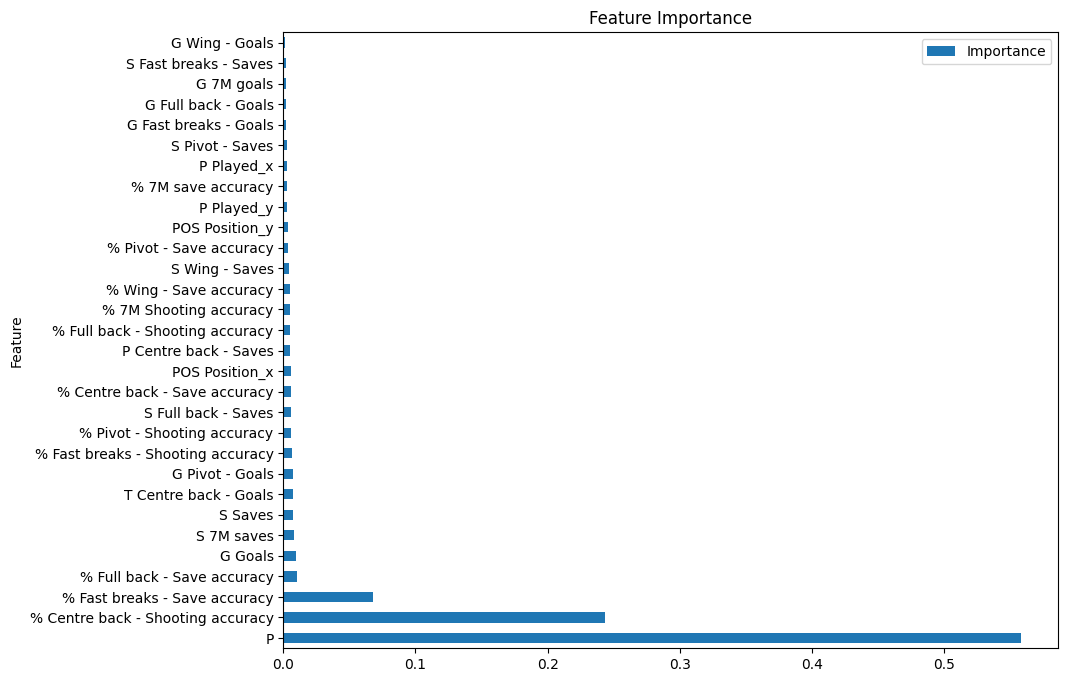

In [22]:
importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df[importance_df['Importance'] > 0 ]
print(importance_df)
importance_df.plot(kind='barh', x='Feature', y='Importance', figsize=(10, 8))
plt.title('Feature Importance')
plt.show()

8.2023/24 season league table, which we compare to the one the model gave us after trying to predict this season's league table.

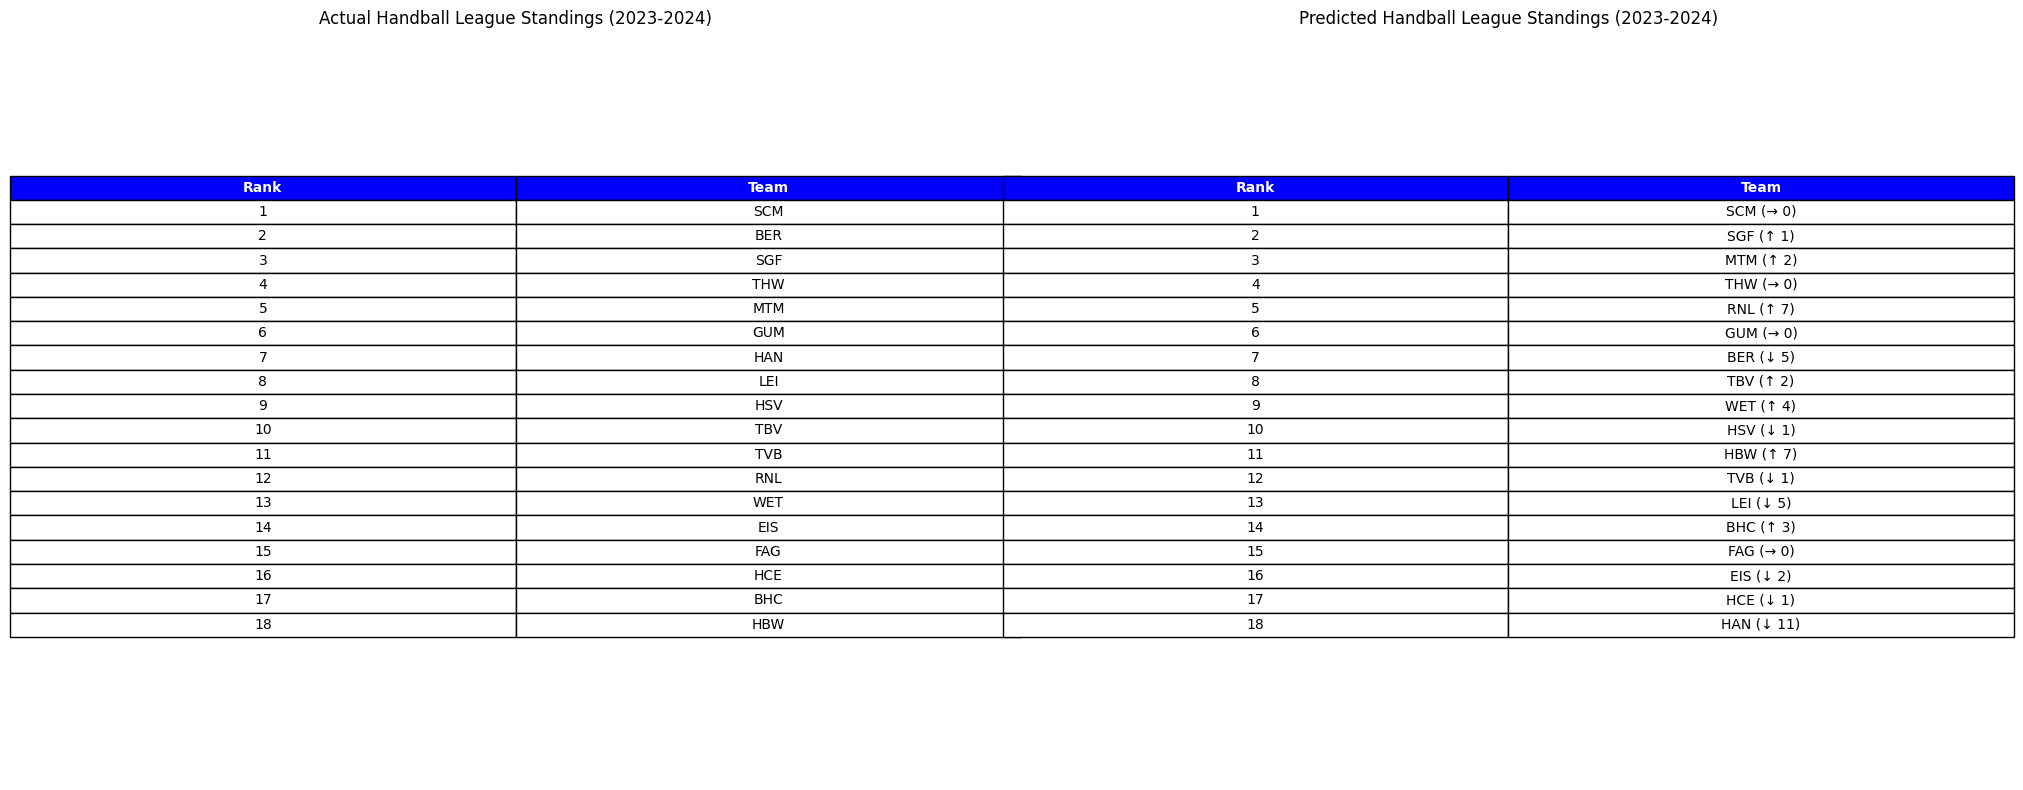

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the actual league standings for the 2023-2024 season from a CSV file
file_path = 'Overall_standings_2023_2024_modified.csv'
league_table = pd.read_csv(file_path)

# Calculate the points for each team
league_table['Points'] = 2 * league_table['W'] + 1 * league_table['D']

# Sort the league table by points in descending order and reset index
sorted_league_table = league_table.sort_values(by='Points', ascending=False).reset_index(drop=True)

# Add a rank column based on sorted points
sorted_league_table['Rank'] = range(1, len(sorted_league_table) + 1)

# Create a DataFrame with the predicted team standings
predicted_df_sorted = pd.DataFrame({'Team': ['SCM', 'SGF', 'MTM', 'THW', 'RNL', 'GUM', 'BER', 'TBV', 'WET', 'HSV', 'HBW', 'TVB', 'LEI', 'BHC', 'FAG', 'EIS', 'HCE', 'HAN']})

# Reset the index and adjust to start at 1 for ranking
predicted_df_sorted = predicted_df_sorted.reset_index(drop=True)
predicted_df_sorted.index += 1

# Add a rank column to the predicted standings
predicted_df_sorted['Rank'] = predicted_df_sorted.index

# Merge actual standings with predicted standings
merged_df = pd.merge(predicted_df_sorted, sorted_league_table[['Team', 'Rank']], on='Team', suffixes=('_pred', '_actual'))

# Calculate the rank change by comparing predicted and actual ranks
merged_df['Rank Change'] = merged_df['Rank_actual'] - merged_df['Rank_pred']

# Format the rank change for display: ↑ for up, ↓ for down, → for no change
merged_df['Rank Change'] = merged_df['Rank Change'].apply(lambda x: f'↑ {abs(x)}' if x > 0 else (f'↓ {abs(x)}' if x < 0 else '→ 0'))

# Create a display column with team names and rank changes
merged_df['Team_Display'] = merged_df['Team'] + ' (' + merged_df['Rank Change'] + ')'

# Create subplots for displaying the actual and predicted tables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.3)

# Hide axes for a cleaner table display
ax1.axis('tight')
ax1.axis('off')
ax2.axis('tight')
ax2.axis('off')

# Create and format the actual standings table
actual_table_data = sorted_league_table[['Rank', 'Team']].values.tolist()
actual_column_labels = ['Rank', 'Team']

actual_table = ax1.table(cellText=actual_table_data, colLabels=actual_column_labels, cellLoc='center', loc='center')
actual_table.auto_set_font_size(False)
actual_table.set_fontsize(10)
actual_table.scale(1.2, 1.2)

# Style the header row of the actual standings table
for i in range(len(actual_column_labels)):
    cell = actual_table[0, i]
    cell.set_facecolor('blue')
    cell.set_text_props(color='white', weight='bold')

# Create and format the predicted standings table
predicted_table_data = merged_df[['Rank_pred', 'Team_Display']].values.tolist()
predicted_column_labels = ['Rank', 'Team']

predicted_table = ax2.table(cellText=predicted_table_data, colLabels=predicted_column_labels, cellLoc='center', loc='center')
predicted_table.auto_set_font_size(False)
predicted_table.set_fontsize(10)
predicted_table.scale(1.2, 1.2)

# Style the header row of the predicted standings table
for i in range(len(predicted_column_labels)):
    cell = predicted_table[0, i]
    cell.set_facecolor('blue')
    cell.set_text_props(color='white', weight='bold')

# Set titles for the tables
ax1.set_title('Actual Handball League Standings (2023-2024)')
ax2.set_title('Predicted Handball League Standings (2023-2024)')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()
